In [110]:
import pandas as pd
import numpy as np

import datetime
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib import verbose

from stldecompose import decompose

import geopandas as gpd

In [111]:
df1 = pd.read_csv(r"C:\Users\bmackenna\Documents\GitHub\Sodium.Valproate.in.Pregnancy\bsa.sodval.csv")
df1



,Time Period,CCG Code,CCG Name,Area Team Code,Area Team Name,No. of prescription forms for sodium valproate,No. of forms with verified patient data,Proportion of Sodium Valproate prescriptions with verified patient data,No. of forms without verified patient data,Proportion of Sodium Valproate prescriptions without verified patient data,...,No. of target prescription forms.1,Proportion of all prescription forms for Sodium Valproate.1,No. of Female patients aged between 18 & 45 prescribed Sodium Valproate,Proportion of all patients receiving prescriptions for Sodium Valproate.2,No. of target prescription forms.2,Proportion of all prescription forms for Sodium Valproate.2,No. of Female patients aged between 14 & 45 prescribed Sodium Valproate,Proportion of all patients receiving prescriptions for Sodium Valproate.3,No. of target prescription forms.3,Proportion of all prescription forms for Sodium Valproate.3
0,2015/16-Q4 Jan-Mar,00C00,DARLINGTON CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",2267,2205,0.972651,62,0.027349,...,8.0,0.003529,61,0.126556,330,0.145567,65,0.134855,337,0.148655
1,2015/16-Q4 Jan-Mar,00D00,"DURHAM DALES,EASINGTON & SEDGEFIELD CCG",Q45,"DURHAM, DARLINGTON AND TEES AREA",6697,6511,0.972226,186,0.027774,...,31.0,0.004629,171,0.113020,767,0.114529,182,0.120291,793,0.118411
2,2015/16-Q4 Jan-Mar,00J00,NORTH DURHAM CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",4478,4357,0.972979,121,0.027021,...,17.0,0.003796,119,0.116098,429,0.095802,121,0.118049,434,0.096918
3,2015/16-Q4 Jan-Mar,00K00,HARTLEPOOL AND STOCKTON-ON-TEES CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",3548,3447,0.971533,101,0.028467,...,31.0,0.008737,127,0.109577,353,0.099493,134,0.115617,379,0.106821
4,2015/16-Q4 Jan-Mar,00L00,NORTHUMBERLAND CCG,Q49,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",5270,4980,0.944972,290,0.055028,...,21.0,0.003985,144,0.111197,472,0.089564,151,0.116602,490,0.092979
5,2015/16-Q4 Jan-Mar,00M00,SOUTH TEES CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",5116,4998,0.976935,118,0.023065,...,78.0,0.015246,151,0.112435,491,0.095973,167,0.124348,546,0.106724
6,2015/16-Q4 Jan-Mar,00N00,SOUTH TYNESIDE CCG,Q49,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",3638,3558,0.978010,80,0.021990,...,10.0,0.002749,84,0.104738,362,0.099505,87,0.108479,369,0.101429
7,2015/16-Q4 Jan-Mar,00P00,SUNDERLAND CCG,Q49,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",7374,6983,0.946976,391,0.053024,...,16.0,0.002170,152,0.100863,595,0.080689,155,0.102853,608,0.082452
8,2015/16-Q4 Jan-Mar,00Q00,BLACKBURN WITH DARWEN CCG,Q47,LANCASHIRE AREA,2643,2589,0.979569,54,0.020431,...,24.0,0.009081,105,0.129151,328,0.124101,113,0.138991,349,0.132047
9,2015/16-Q4 Jan-Mar,00R00,BLACKPOOL CCG,Q47,LANCASHIRE AREA,4341,3960,0.912232,381,0.087768,...,9.0,0.002073,134,0.123845,472,0.108731,136,0.125693,475,0.109422


In [112]:
df1["year"] = df1["Time Period"].apply(str).str[:4]
df1["quarter"] = df1["Time Period"].apply(str).str[9]
df1["quarter_start_month"] = df1["quarter"].apply(int) * 3 - 2


df1["date"] = pd.to_datetime(df1["year"] + '-' + df1["quarter_start_month"].apply(str) + '-' + str(1))+ pd.DateOffset(months = 3)


##parsed_date = date(year, quarter_start_month, 1)

df1

# convert Date field to date format
#df1["date"] = df1.Date.apply(str).str[:4] + '-' + df1.Date.apply(str).str[4:6] + '-' + df1.Date.apply(str).str[6:]
#df1["date"] = pd.to_datetime(df1.date)


#['Time Period'] = datetime.datetime.strptime(orig_date = "2015/16-Q4 Jan-Mar",
#year = int(df1['Time Period'].str[0:4]),
#quarter = int(df1['Time Period'][9]),
#quarter_start_month = quarter * 3 - 2,
#parsed_date = date(year, quarter_start_month, 1))                                              
                                                
##orig_date = "2015/16-Q4 Jan-Mar"
##year = int(orig_date[0:4])
##quarter = int(org_date[9])
##quarter_start_month = quarter * 3 - 2
##parsed_date = date(year, quarter_start_month, 1)


,Time Period,CCG Code,CCG Name,Area Team Code,Area Team Name,No. of prescription forms for sodium valproate,No. of forms with verified patient data,Proportion of Sodium Valproate prescriptions with verified patient data,No. of forms without verified patient data,Proportion of Sodium Valproate prescriptions without verified patient data,...,No. of target prescription forms.2,Proportion of all prescription forms for Sodium Valproate.2,No. of Female patients aged between 14 & 45 prescribed Sodium Valproate,Proportion of all patients receiving prescriptions for Sodium Valproate.3,No. of target prescription forms.3,Proportion of all prescription forms for Sodium Valproate.3,year,quarter,quarter_start_month,date
0,2015/16-Q4 Jan-Mar,00C00,DARLINGTON CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",2267,2205,0.972651,62,0.027349,...,330,0.145567,65,0.134855,337,0.148655,2015,4,10,2016-01-01
1,2015/16-Q4 Jan-Mar,00D00,"DURHAM DALES,EASINGTON & SEDGEFIELD CCG",Q45,"DURHAM, DARLINGTON AND TEES AREA",6697,6511,0.972226,186,0.027774,...,767,0.114529,182,0.120291,793,0.118411,2015,4,10,2016-01-01
2,2015/16-Q4 Jan-Mar,00J00,NORTH DURHAM CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",4478,4357,0.972979,121,0.027021,...,429,0.095802,121,0.118049,434,0.096918,2015,4,10,2016-01-01
3,2015/16-Q4 Jan-Mar,00K00,HARTLEPOOL AND STOCKTON-ON-TEES CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",3548,3447,0.971533,101,0.028467,...,353,0.099493,134,0.115617,379,0.106821,2015,4,10,2016-01-01
4,2015/16-Q4 Jan-Mar,00L00,NORTHUMBERLAND CCG,Q49,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",5270,4980,0.944972,290,0.055028,...,472,0.089564,151,0.116602,490,0.092979,2015,4,10,2016-01-01
5,2015/16-Q4 Jan-Mar,00M00,SOUTH TEES CCG,Q45,"DURHAM, DARLINGTON AND TEES AREA",5116,4998,0.976935,118,0.023065,...,491,0.095973,167,0.124348,546,0.106724,2015,4,10,2016-01-01
6,2015/16-Q4 Jan-Mar,00N00,SOUTH TYNESIDE CCG,Q49,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",3638,3558,0.978010,80,0.021990,...,362,0.099505,87,0.108479,369,0.101429,2015,4,10,2016-01-01
7,2015/16-Q4 Jan-Mar,00P00,SUNDERLAND CCG,Q49,"CUMBRIA,NORTHUMB,TYNE & WEAR AREA",7374,6983,0.946976,391,0.053024,...,595,0.080689,155,0.102853,608,0.082452,2015,4,10,2016-01-01
8,2015/16-Q4 Jan-Mar,00Q00,BLACKBURN WITH DARWEN CCG,Q47,LANCASHIRE AREA,2643,2589,0.979569,54,0.020431,...,328,0.124101,113,0.138991,349,0.132047,2015,4,10,2016-01-01
9,2015/16-Q4 Jan-Mar,00R00,BLACKPOOL CCG,Q47,LANCASHIRE AREA,4341,3960,0.912232,381,0.087768,...,472,0.108731,136,0.125693,475,0.109422,2015,4,10,2016-01-01


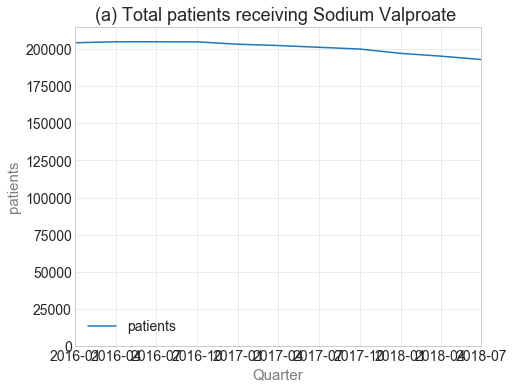

In [123]:

sns.set_style("whitegrid",{'grid.color': '.9'})
dfp = df1.sort_values(by=["date"])
dfp['date'] = dfp['date'].astype(str)
# set format for dates:
dfp['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dfp['date']]


fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(3,2)  # grid layout for subplots


####total patients
data = dfp.groupby('date').sum()[['No. of identifiable and verified patients receiving prescribing for Sodium Valproate']]

ax = plt.subplot(gs[0,0])
ax.plot(data,label='patients')
##ax.plot(calc.trend,'--',label='trend')
ax.set_ylabel('patients', size =15, alpha=0.6)
ax.set_xlabel('Quarter', size =15, alpha=0.6)
ax.set_title('(a) Total patients receiving Sodium Valproate ',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim([dfp['date'].min(), dfp['date'].max()]) # set x axis range as full date range
max_value = data["No. of identifiable and verified patients receiving prescribing for Sodium Valproate"].max()*1.05
ax.set_ylim([0,max_value])
ax.legend(prop={'size': 14})


plt.show()






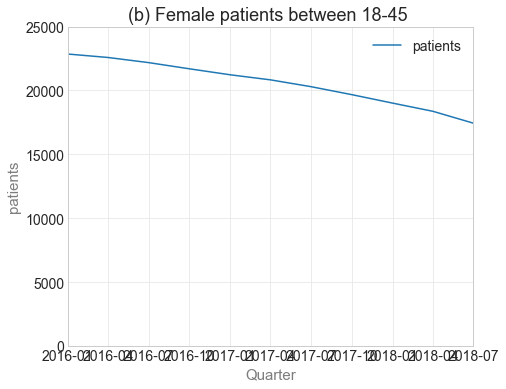

In [128]:
sns.set_style("whitegrid",{'grid.color': '.9'})
dfp = df1.sort_values(by=["date"])
dfp['date'] = dfp['date'].astype(str)
# set format for dates:
dfp['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dfp['date']]


fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(3,2)  # grid layout for subplots


####total patients
data = dfp.groupby('date').sum()[['No. of Female patients aged between 18 & 45 prescribed Sodium Valproate']]
#### Female 18-45
ax = plt.subplot(gs[0,1])
ax.plot(data,label='patients')
##ax.plot(calc.trend,'--',label='trend')
ax.set_ylabel('patients', size =15, alpha=0.6)
ax.set_xlabel('Quarter', size =15, alpha=0.6)
ax.set_title('(b) Female patients between 18-45 ',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim([dfp['date'].min(), dfp['date'].max()]) # set x axis range as full date range
max_value = data["No. of Female patients aged between 18 & 45 prescribed Sodium Valproate"].max()*1.05
ax.set_ylim([0,25000])
ax.legend(prop={'size': 14})
plt.show() 


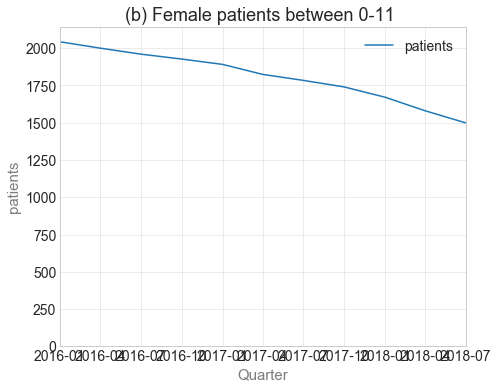

In [129]:
sns.set_style("whitegrid",{'grid.color': '.9'})
dfp = df1.sort_values(by=["date"])
dfp['date'] = dfp['date'].astype(str)
# set format for dates:
dfp['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dfp['date']]


fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(3,2)  # grid layout for subplots


####total patients
data = dfp.groupby('date').sum()[['Number ofFemale patients aged between 0 & 11 prescribed Sodium Valproate']]
#### Female 18-45
ax = plt.subplot(gs[0,1])
ax.plot(data,label='patients')
##ax.plot(calc.trend,'--',label='trend')
ax.set_ylabel('patients', size =15, alpha=0.6)
ax.set_xlabel('Quarter', size =15, alpha=0.6)
ax.set_title('(b) Female patients between 0-11 ',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim([dfp['date'].min(), dfp['date'].max()]) # set x axis range as full date range
max_value = data["Number ofFemale patients aged between 0 & 11 prescribed Sodium Valproate"].max()*1.05
ax.set_ylim([0,max_value])
ax.legend(prop={'size': 14})
plt.show() 


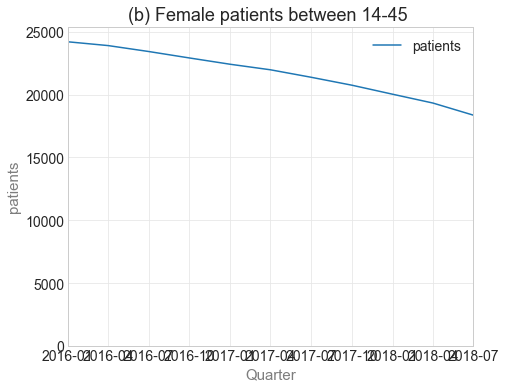

In [130]:
sns.set_style("whitegrid",{'grid.color': '.9'})
dfp = df1.sort_values(by=["date"])
dfp['date'] = dfp['date'].astype(str)
# set format for dates:
dfp['date'] = [datetime.datetime.strptime(date, '%Y-%m-%d').date() for date in dfp['date']]


fig = plt.figure(figsize=(16,20)) 
gs = gridspec.GridSpec(3,2)  # grid layout for subplots


####total patients
data = dfp.groupby('date').sum()[['No. of Female patients aged between 14 & 45 prescribed Sodium Valproate']]
#### Female 18-45
ax = plt.subplot(gs[0,1])
ax.plot(data,label='patients')
##ax.plot(calc.trend,'--',label='trend')
ax.set_ylabel('patients', size =15, alpha=0.6)
ax.set_xlabel('Quarter', size =15, alpha=0.6)
ax.set_title('(b) Female patients between 14-45 ',size = 18)
ax.tick_params(labelsize=14)
ax.set_xlim([dfp['date'].min(), dfp['date'].max()]) # set x axis range as full date range
max_value = data["No. of Female patients aged between 14 & 45 prescribed Sodium Valproate"].max()*1.05
ax.set_ylim([0,max_value])
ax.legend(prop={'size': 14})
plt.show() 


# MAPS

In [139]:
from urllib.request import urlopen
from urllib.request import Request
import json
url = "https://openprescribing.net/api/1.0/org_location/?org_type=ccg"
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}
req = Request(url, headers=hdr)
page = urlopen(req)
json_file = json.loads(page.read().decode())
with open('ccgs.json', 'w') as outfile:
    json.dump(json_file, outfile)

In [143]:
# join to geographical data
map_data = df1

#map_data = map_data.round(0)
map_data.tail(5) 


2018-07-01

,Time Period,CCG Code,CCG Name,Area Team Code,Area Team Name,No. of prescription forms for sodium valproate,No. of forms with verified patient data,Proportion of Sodium Valproate prescriptions with verified patient data,No. of forms without verified patient data,Proportion of Sodium Valproate prescriptions without verified patient data,...,No. of target prescription forms.2,Proportion of all prescription forms for Sodium Valproate.2,No. of Female patients aged between 14 & 45 prescribed Sodium Valproate,Proportion of all patients receiving prescriptions for Sodium Valproate.3,No. of target prescription forms.3,Proportion of all prescription forms for Sodium Valproate.3,year,quarter,quarter_start_month,date
2258,2018/19-Q2 Jul-Sep,99K00,HIGH WEALD LEWES HAVENS CCG,Q68,SURREY AND SUSSEX AREA,1598,1574,0.984981,24,0.015019,...,114,0.071339,48,0.095618,131,0.081977,2018,2,4,2018-07-01
2259,2018/19-Q2 Jul-Sep,99M00,NORTH EAST HAMPSHIRE AND FARNHAM CCG,Q70,WESSEX AREA,1941,1910,0.984029,31,0.015971,...,160,0.082432,54,0.091062,167,0.086038,2018,2,4,2018-07-01
2260,2018/19-Q2 Jul-Sep,99N00,WILTSHIRE CCG,Q64,"BATH,GLOS,SWINDON & WILTSHIRE AREA",4726,4660,0.986035,66,0.013965,...,384,0.081253,136,0.086957,396,0.083792,2018,2,4,2018-07-01
2261,2018/19-Q2 Jul-Sep,99P00,"NORTH, EAST, WEST DEVON CCG",Q66,"DEVON,CORNWALL&ISLES OF SCILLY AREA",14036,13768,0.980906,268,0.019094,...,1031,0.073454,327,0.085490,1083,0.077159,2018,2,4,2018-07-01
2262,2018/19-Q2 Jul-Sep,99Q00,SOUTH DEVON AND TORBAY CCG,Q66,"DEVON,CORNWALL&ISLES OF SCILLY AREA",3911,3885,0.993352,26,0.006648,...,316,0.080798,115,0.090981,324,0.082843,2018,2,4,2018-07-01


In [135]:
# from our API https://openprescribing.net/api/1.0/org_location/?org_type=ccg
ccgs = gpd.read_file('ccgs.json').set_index('name')

ccgs = ccgs[~ccgs['geometry'].isnull()]  # remove ones without geometry - these are federations rather than individual CCGs
gdf = ccgs.join(map_data)

# set sort order of measures manually, and add grid refs to position each subplot:
s = [(0,'Proportion of all patients receiving prescriptions for Sodium Valproate',0,0,' Proportion of all patients receiving prescriptions for Sodium Valproate')]

fig = plt.figure(figsize=(16,30))
gs = gridspec.GridSpec(4,2)  # grid layout for subplots

for i in s:
    ax = plt.subplot(gs[i[2], i[3]])  # position of subplot in grid using coordinates listed in s
    gdf.plot(ax=ax,column=i[1],  edgecolor='black', linewidth=0.1, legend=True, cmap='OrRd')
    ax.set_aspect(1.63)
    ax.set_title(i[4],size = 18)
    plt.axis('off')

plt.subplots_adjust(wspace = 0.05,hspace = 0.07)
plt.savefig('maps.png', format='png', dpi=300,bbox_inches='tight')

plt.show()

NameError: name 'map_data' is not defined